In [1]:

def d3_armor_reduction(df):
    df_c = df.copy()
    df_c['d3_res_reduction'] = (df_c['armor'] / (df_c['armor'] + df_c['lvl'] * 5)) * 100
    df_c['d3_res_dmg_taken'] = df_c['dpt100'] / 100 * (100 - df_c['d3_res_reduction'])
    return df_c


def lol_res_reduction(df):
    df_c = df.copy()
    lol_multi_cond = [df_c['armor'] < 0, df_c['armor'] >= 0]
    lol_neg_def = 2 - (100 / (100 - df_c['armor']))
    lol_pos_def = 100 / (100 + df_c['armor'])

    df_c['dmg_multi_lol'] = np.select(lol_multi_cond, [lol_neg_def, lol_pos_def])
    df_c['lol_dmg_taken'] = df_c['dmg_multi_lol'] * df_c['dpt100']
    return df_c


def avg_dmg_redu_dodge(df):
    df_c = df.copy()
    df_c['lol_dmg_redu_dodge'] = df_c['lol_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    df_c['d3_dmg_redu_dodge'] = df_c['d3_res_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    return df_c

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from all import *
f_results = fight_results[fight_results.columns[-(len(cl_df_list)*2):]]


In [3]:
f_results.apply(lambda row: [(unit.name, round(unit.hp / unit.max_hp * 100, 2)) for unit in row])

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
0,"(str_cl, 10.82)","(int_cl, 8.39)","(int_cl, 31.61)","(str_cl, 8.82)","(int_cl, 12.04)","(int_cl, 34.05)"
1,"(str_cl, 27.6)","(int_cl, 19.38)","(int_cl, 29.07)","(str_cl, 5.73)","(int_cl, 14.23)","(int_cl, 20.21)"
2,"(str_cl, 46.92)","(int_cl, 3.3)","(int_cl, 16.57)","(str_cl, 13.58)","(int_cl, 24.49)","(int_cl, 29.44)"
3,"(str_cl, 39.36)","(str_cl, 25.38)","(int_cl, 40.76)","(str_cl, 18.65)","(str_cl, 30.76)","(int_cl, 36.25)"
4,"(str_cl, 45.29)","(str_cl, 2.2)","(int_cl, 36.15)","(str_cl, 35.76)","(int_cl, 39.08)","(int_cl, 40.31)"
5,"(str_cl, 41.67)","(int_cl, 0.24)","(int_cl, 20.0)","(str_cl, 11.82)","(int_cl, 16.87)","(int_cl, 30.27)"
6,"(str_cl, 37.78)","(str_cl, 16.79)","(int_cl, 52.93)","(str_cl, 37.19)","(str_cl, 22.67)","(int_cl, 33.33)"
7,"(str_cl, 33.1)","(int_cl, 1.32)","(int_cl, 39.83)","(str_cl, 29.25)","(int_cl, 35.43)","(int_cl, 30.41)"
8,"(str_cl, 45.5)","(int_cl, 43.95)","(int_cl, 62.51)","(str_cl, 56.69)","(int_cl, 2.72)","(int_cl, 29.44)"
9,"(str_cl, 28.42)","(str_cl, 1.97)","(int_cl, 15.3)","(str_cl, 38.03)","(int_cl, 35.14)","(int_cl, 10.23)"


In [4]:
get_unit_attribute(f_results, 'name').describe()

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
count,30,30,30,30,30,30
unique,2,2,2,2,2,2
top,str_cl,int_cl,int_cl,str_cl,int_cl,int_cl
freq,16,22,20,17,24,19


In [5]:
# approx turns it took to win
turns_to_win = (get_unit_attribute(f_results, 'ct_to_win') / 100)[1:]  # clock ticks it took to win / 100 ticks (for a turn)
turns_to_win

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
1,50.60,43.20,39.60,17.48,13.50,13.50
2,32.56,31.08,31.92,18.48,10.08,10.08
3,28.05,21.25,19.75,13.60,9.35,9.48
4,19.44,18.63,11.84,11.34,5.92,5.92
5,17.94,16.10,14.00,13.26,7.70,7.70
6,17.25,12.00,7.92,9.00,6.75,5.94
7,16.56,11.34,8.82,9.36,5.67,5.04
8,13.30,9.60,7.20,7.00,8.40,6.00
9,13.60,7.48,10.26,8.84,5.13,6.27
10,10.40,8.80,4.40,8.45,5.50,3.30


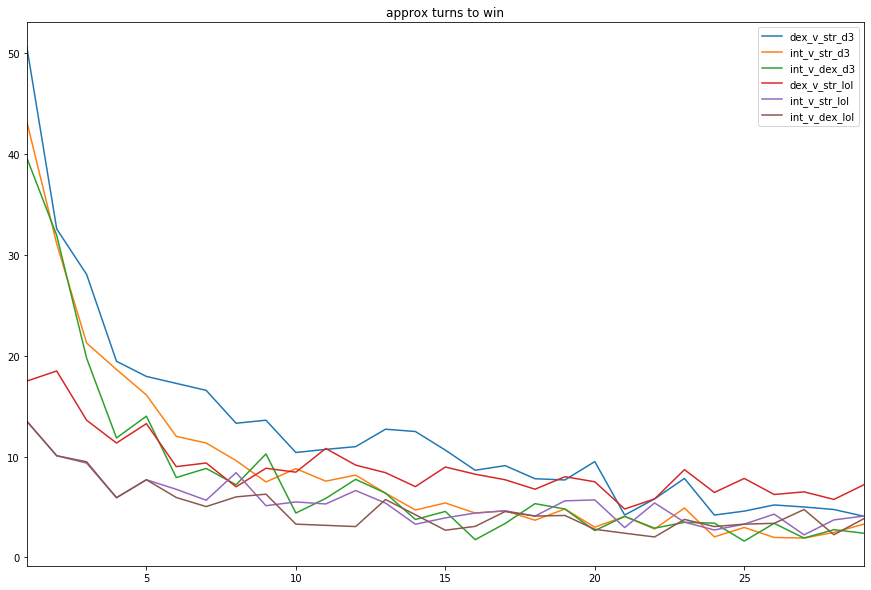

In [6]:

turns_to_win.plot(title='approx turns to win' ,figsize=[15,10])

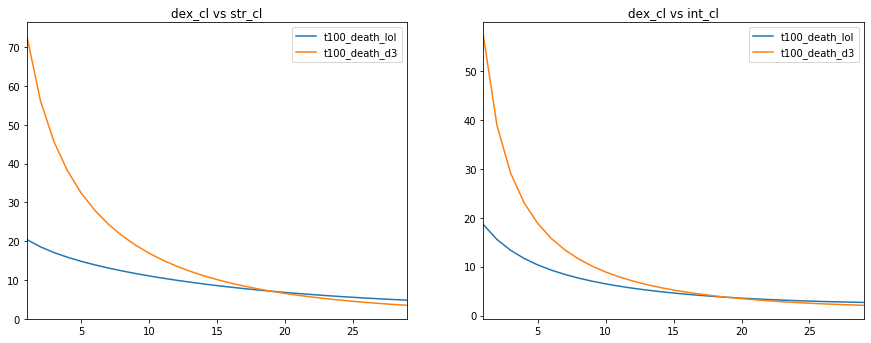

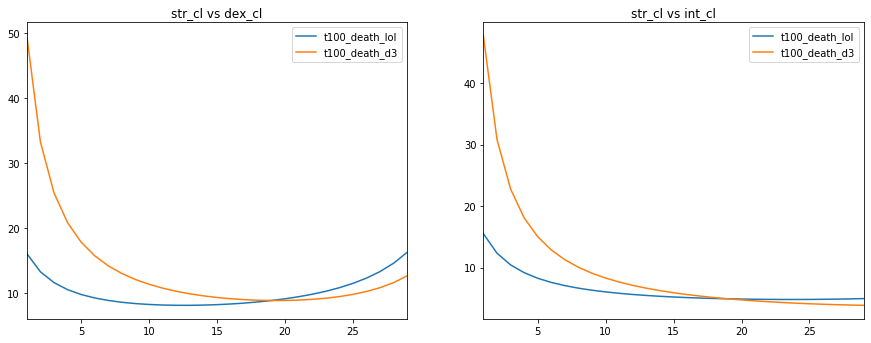

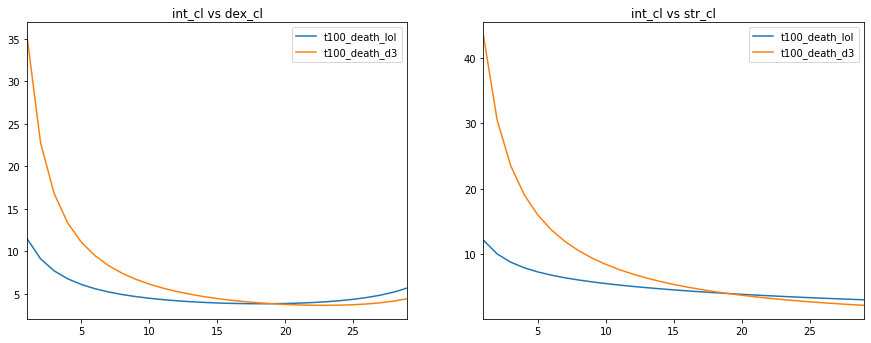

In [7]:
# how many 100clock ticks does it take to kill the defender
for i,attacker in enumerate(cl_df_list):
    cl_df_l_copy = cl_df_list.copy()
    cl_df_l_copy.pop(i)
    
    fig = plt.figure(figsize=[15, 12])
    for n, defender in enumerate(cl_df_l_copy):
        ax = fig.add_subplot(221+n)
        test_df = pd.concat([attacker[['dpt100', 'lvl']], defender[['dodge', 'd3_res_reduction', 'dmg_multi_lol', 'hp', 'armor']]], axis=1)
        
        test_df = d3_armor_reduction(test_df)
        test_df = lol_res_reduction(test_df)
        test_df = avg_dmg_redu_dodge(test_df)
        test_df['t100_death_lol'] = test_df['hp'] / test_df['lol_dmg_redu_dodge']
        test_df['t100_death_d3'] = test_df['hp'] / test_df['d3_dmg_redu_dodge']
        test_df[['t100_death_lol', 't100_death_d3']].iloc[1:].plot(title=attacker.name+' vs '+defender.name, ax=ax)

In [8]:
compare(all_cl_df, ['speed', 'ticks_to_turn'])

,speed_dex,speed_str,speed_int,ticks_to_turn_dex,ticks_to_turn_str,ticks_to_turn_int
0,10.4,10.4,10.4,96.15,96.15,96.15
1,11.5,10.9,11.2,86.96,91.74,89.29
2,12.6,11.4,12.0,79.37,87.72,83.33
3,13.7,11.9,12.8,72.99,84.03,78.12
4,14.8,12.4,13.6,67.57,80.65,73.53
5,15.9,12.9,14.4,62.89,77.52,69.44
6,17.0,13.4,15.2,58.82,74.63,65.79
7,18.1,13.9,16.0,55.25,71.94,62.50
8,19.2,14.4,16.8,52.08,69.44,59.52
9,20.3,14.9,17.6,49.26,67.11,56.82


In [9]:
compare(all_cl_df, ['dodge', 'crit_dmg', 'crit_chan'])

,dodge_dex,dodge_str,dodge_int,crit_dmg_dex,crit_dmg_str,crit_dmg_int,crit_chan_dex,crit_chan_str,crit_chan_int
0,11.64,11.64,11.64,138,138,138,8.0,8.0,8.0
1,14.10,12.54,13.32,148,142,145,10.3,8.9,9.6
2,16.56,13.44,15.00,158,146,152,12.6,9.8,11.2
3,19.02,14.34,16.68,168,150,159,14.9,10.7,12.8
4,21.48,15.24,18.36,178,154,166,17.2,11.6,14.4
5,23.94,16.14,20.04,188,158,173,19.5,12.5,16.0
6,26.40,17.04,21.72,198,162,180,21.8,13.4,17.6
7,28.86,17.94,23.40,208,166,187,24.1,14.3,19.2
8,31.32,18.84,25.08,218,170,194,26.4,15.2,20.8
9,33.78,19.74,26.76,228,174,201,28.7,16.1,22.4


In [10]:
compare(all_cl_df, ['m_dmg_wo_wpn', 'p_dmg_wo_wpn','b_dmg' ,'dpt100'])

,m_dmg_wo_wpn_dex,m_dmg_wo_wpn_str,m_dmg_wo_wpn_int,p_dmg_wo_wpn_dex,p_dmg_wo_wpn_str,p_dmg_wo_wpn_int,b_dmg_dex,b_dmg_str,b_dmg_int,dpt100_dex,dpt100_str,dpt100_int
0,4.3,4.3,4.3,3.5,3.5,3.5,80.6,95.72,113.86,86.38,102.58,122.02
1,5.9,5.9,7.7,4.9,6.3,4.9,99.8,124.52,172.62,120.44,140.81,201.68
2,7.5,7.5,11.1,6.3,9.1,6.3,119.0,164.84,231.37,160.89,196.39,293.83
3,9.1,9.1,14.5,7.7,11.9,7.7,138.2,205.16,290.12,208.53,257.21,399.42
4,10.7,10.7,17.9,9.1,14.7,9.1,157.4,245.48,348.87,264.20,323.44,519.55
5,12.3,12.3,21.3,10.5,17.5,10.5,176.6,285.80,407.62,328.99,395.41,655.57
6,13.9,13.9,24.7,11.9,20.3,11.9,195.8,326.12,466.38,404.00,473.29,808.70
7,15.5,15.5,28.1,13.3,23.1,13.3,215.0,366.44,525.13,490.43,557.44,980.56
8,17.1,17.1,31.5,14.7,25.9,14.7,234.2,406.76,583.88,589.78,648.10,1172.78
9,18.7,18.7,34.9,16.1,28.7,16.1,253.4,447.08,642.63,703.39,745.56,1386.87


In [11]:
compare(all_cl_df, ['m_dmg', 'p_dmg', 'dpt100'])

,m_dmg_dex,m_dmg_str,m_dmg_int,p_dmg_dex,p_dmg_str,p_dmg_int,dpt100_dex,dpt100_str,dpt100_int
0,80.6,95.72,113.86,71.0,84.20,100.04,86.38,102.58,122.02
1,99.8,118.76,172.62,87.8,124.52,124.23,120.44,140.81,201.68
2,119.0,141.80,231.37,104.6,164.84,148.42,160.89,196.39,293.83
3,138.2,164.84,290.12,121.4,205.16,172.62,208.53,257.21,399.42
4,157.4,187.88,348.87,138.2,245.48,196.81,264.20,323.44,519.55
5,176.6,210.92,407.62,155.0,285.80,221.00,328.99,395.41,655.57
6,195.8,233.96,466.38,171.8,326.12,245.19,404.00,473.29,808.70
7,215.0,257.00,525.13,188.6,366.44,269.38,490.43,557.44,980.56
8,234.2,280.04,583.88,205.4,406.76,293.58,589.78,648.10,1172.78
9,253.4,303.08,642.63,222.2,447.08,317.77,703.39,745.56,1386.87


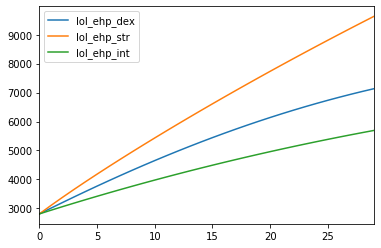

In [12]:
compare(all_cl_df, ['lol_ehp',]).plot()

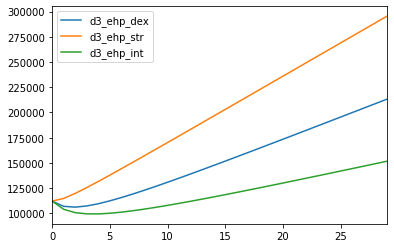

In [13]:
compare(all_cl_df, ['d3_ehp',]).plot()

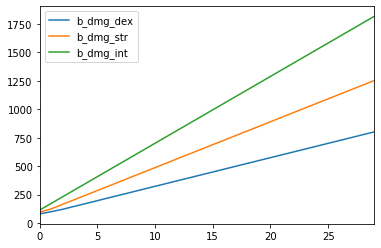

In [14]:
compare(all_cl_df, ['b_dmg',]).plot()

In [13]:
cl_df_l_copy = cl_df_list.copy()

In [15]:
cl_df_l_copy[0]

,lvl,vit,dex,str,int,u_name,speed,ticks_to_turn,hp,p_dmg_wo_wpn,...,armor,dodge,d3_res_reduction,d3_res_dmg_taken,dmg_multi_lol,lol_dmg_taken,lol_dmg_redu_dodge,d3_dmg_redu_dodge,lol_ehp,d3_ehp
0,1,4,4,4,4,dex_cl,10.24,97.66,1370,3.5,...,20,11.320,80.000000,16.982000,0.833333,70.758333,62.748490,15.059638,2813.249333,112184.916000
1,2,6,7,6,5,dex_cl,10.43,95.88,1460,5.6,...,29,13.815,74.358974,27.912821,0.775194,84.387597,72.729450,24.056664,3046.518054,111282.403564
2,3,8,10,8,6,dex_cl,10.62,94.16,1550,7.7,...,38,16.310,71.698113,38.926415,0.724638,99.666667,83.411033,32.577517,3274.006594,113979.270472
3,4,10,13,10,7,dex_cl,10.81,92.51,1640,9.8,...,47,18.805,70.149254,51.638806,0.680272,117.680272,95.550497,41.928129,3495.951741,118016.374119
4,5,12,16,12,8,dex_cl,11.00,90.91,1730,11.9,...,56,21.300,69.135802,65.348765,0.641026,135.724359,106.815071,51.429478,3712.535641,122696.448272
5,6,14,19,14,9,dex_cl,11.19,89.37,1820,14.0,...,65,23.795,68.421053,80.264211,0.606061,154.042424,117.388029,61.165342,3923.900697,127733.246789
6,7,16,22,16,10,dex_cl,11.38,87.87,1910,16.1,...,74,26.290,67.889908,96.596789,0.574713,172.890805,127.437812,71.201493,4130.159851,132987.585771
7,8,18,25,18,11,dex_cl,11.57,86.43,2000,18.2,...,83,28.785,67.479675,114.510569,0.546448,192.415301,137.028556,81.548702,4331.403825,138383.649593
8,9,20,28,20,12,dex_cl,11.76,85.03,2090,20.3,...,92,31.280,67.153285,134.214964,0.520833,212.817708,146.248329,92.232523,4527.706333,143876.612964
9,10,22,31,22,13,dex_cl,11.95,83.68,2180,22.4,...,101,33.775,66.887417,155.887417,0.497512,234.218905,155.111470,103.236442,4719.127886,149438.274536
